<a href="https://colab.research.google.com/github/sanjayk0508/Stack-overflow-Data-Analysis/blob/main/StackOverflow_survey_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stack Overflow Developer Survey Data analysis

#Introduction
The Stack Overflow Developer Survey is an annual global survey conducted by Stack Overflow, offering insights into the diverse demographics, preferences, and trends among software developers worldwide. It serves as a comprehensive resource for understanding developer behaviors, technology choices, and career-related aspects within the software development industry.

In [2]:
import pandas as pd
import numpy as np

In [3]:
survey_raw_df = pd.read_csv("/content/survey_results_public.csv")
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
schema_fname = '/content/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [6]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

We can now use schema_raw to retrieve the full question text for any column in `survey_raw_df`.

In [7]:
schema_raw['YearsCode']

'Including any education, how many years have you been coding in total?'

#Data Processing and Cleaning
It is important to specify the specific analysis we will be working on. This is because during data processing we will processing and transforming the raw data according to our suitable analysis.

Analysis include:
* Demographics of the survey respondents and the global programming community
* Distribution of programming skills, experience, and preferences
* Employment-related information, preferences, and opinions

In [8]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt']

In [9]:
len(selected_columns)

20

Copying the data from this selected columns into a new data frame

In [10]:
survey_df = survey_raw_df[selected_columns].copy()
schema = schema_raw[selected_columns]

Basic information about the data frame

In [11]:
survey_df.shape

(64461, 20)

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

The columns `Age1stCode`, `YearsCode`, and `YearsCodePro` contain options such as 'less than 5 years' and 'more than 50 years', which are non-numeric values. To overcome this issue, we have converted them to **NaN** (Not a Number).

In [13]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Basic statistics

In [14]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Here we can see that the minimum age is 1 and maximum age 279 which is unlikely or a mistake. So, to overcome this issue we will be removing the rows which are lower than 10 and higher than 100.

In [15]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

Same holds true for `WorkWeekHrs`. Lets ignore the values higher than 140 hours. (~20 hrs per day)

In [16]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The Gender column contains multiple option. So to simplify our analysis we will be removing few options

In [17]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [18]:
accepted_genders = ['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming']
survey_df = survey_df[survey_df['Gender'].isin(accepted_genders)]

In [19]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
23327,India,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,13.0,9.0,HTML/CSS;Java;JavaScript;SQL,HTML/CSS;Java;SQL,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, full-stack",46.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Very important
32356,Israel,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,15.0,25.0,15.0,Bash/Shell/PowerShell;C;C++;Java;Objective-C;S...,Bash/Shell/PowerShell;C;C++;Go;Java;Kotlin;Obj...,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",45.0,Very satisfied,Office environment or company culture;Opportun...,Sometimes: 1-2 days per month but less than we...,Critically important
14008,Germany,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,9.0,4.0,HTML/CSS;Java;SQL,HTML/CSS;Java;JavaScript;SQL,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Somewhat important
38560,Poland,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,8.0,5.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,JavaScript;Python;SQL,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, full-stack",45.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Fairly important
42105,United Kingdom,20.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,16.0,5.0,NaN,C;HTML/CSS;Java;SQL;Swift,C;C#;C++;HTML/CSS;Java;JavaScript;PHP;Python;S...,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,Data or business analyst,NaN,NaN,Flex time or a flexible schedule;Remote work o...,NaN,NaN
34571,Brazil,47.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,14.0,30.0,25.0,Java;SQL,Java;Rust;SQL,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Critically important
10537,Republic of Moldova,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,14.0,4.0,NaN,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;JavaSc...,C#,Every few months,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, full-stack",40.0,Slightly satisfied,Flex time or a flexible schedule;Specific depa...,Often: 1-2 days per week or more,Somewhat important
20671,India,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,17.0,15.0,13.0,Bash/Shell/PowerShell;Go;Java;JavaScript;Python,Bash/Shell/PowerShell;Go;JavaScript;Python,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, full-stack;DevO...",40.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
10107,Spain,25.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,8.0,4.0,HTML/CSS;Java;JavaScript;PHP;Pytho

#Exploratory Data Analysis and Visualization
Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##Country
Looking at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [21]:
schema.Country

'Where do you live?'

In [22]:
survey_df.Country.nunique()

172

In [23]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         10392
India                  5376
Germany                3317
United Kingdom         3259
Canada                 1811
France                 1540
Brazil                 1439
Netherlands            1127
Poland                 1065
Australia              1018
Spain                   940
Italy                   927
Russian Federation      872
Sweden                  753
Turkey                  585
Name: Country, dtype: int64

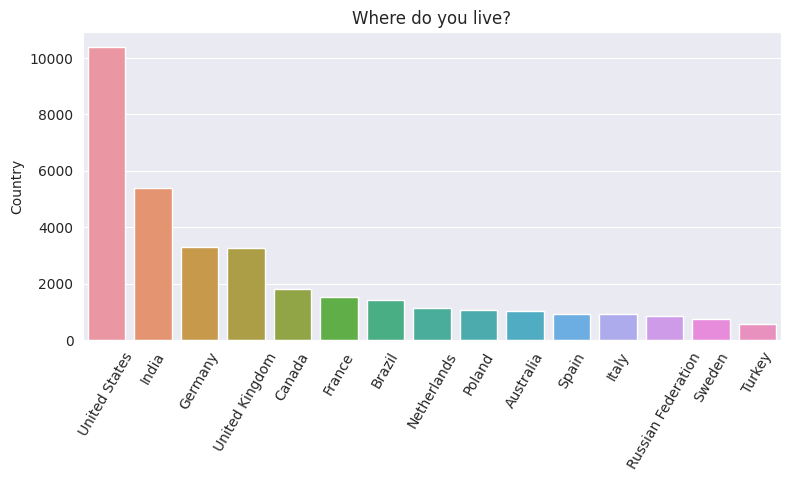

In [24]:
plt.figure(figsize=(9,4))
plt.xticks(rotation=60)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);


> A significant number of survey respondents seem to originate from the US and India, likely due to the survey being conducted in English, and these countries having larger English speaking populations. This observation indicates that the survey might not accurately represent the worldwide programming community, especially those from non-English speaking nations. It's highly probable that programmers from non-English speaking countries are not proportionally represented in this survey.



##Age
Distribution of Age

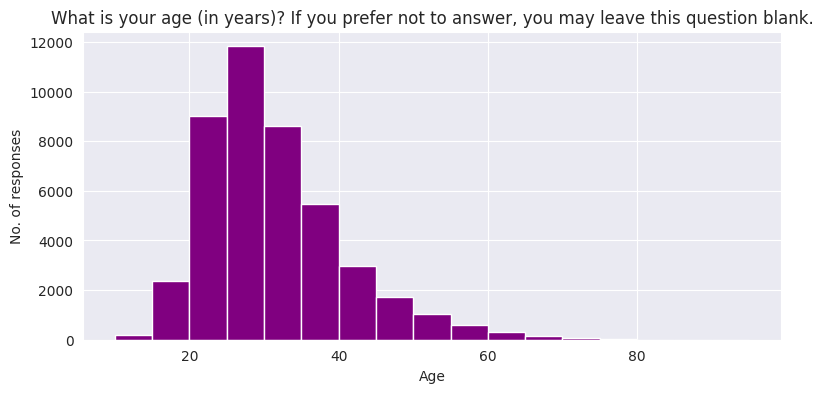

In [25]:
plt.figure(figsize=(9,4))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('No. of responses')

plt.hist(survey_df.Age, bins=np.arange(10,100,5), color='purple');


> A significant portion of individuals who participated in the survey fall within the age range of `20 to 45 years`. This demographic aligns fairly well with the overall programming community. Over the past two decades, a considerable number of young individuals have chosen computer science as their academic pursuit or professional career.


For a more comprehensive examination, we can segregate the responses based on different age brackets. This can be accomplished by introducing a new column named AgeGroup, categorizing respondents into distinct groups such as Less than `10 years`, `10-18 years`, `18-30 years`, `30-45 years`, `45-60 years`, and `Older than 60 years`. Afterward, we can carry out an analysis within this notebook for each of these specified age groups.

##Gender
Now let's look at the gender distribution from the response. We might see a skewed data here, the reason being women and non-binary people are underrepresented the programming community in general.

In [26]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [27]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

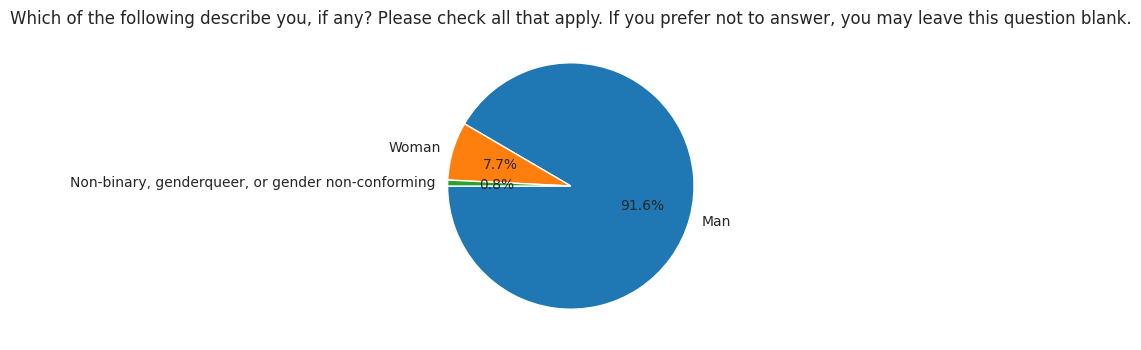

In [28]:
plt.figure(figsize=(9,4))
plt.title(schema.Gender)

plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180);

> Merely around 8% of those surveyed and responded to the question identify themselves as women or non-binary. This figure falls short of the estimated overall representation of women and non-binary individuals in the programming community, which is approximately 12%.

It would also be interesting to compare the survey responses & preferences across genders. Repeat this analysis with these breakdowns:
* How do the relative education levels differ across genders?
* How do the salaries vary?, etc.

##Educational Level
Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this.

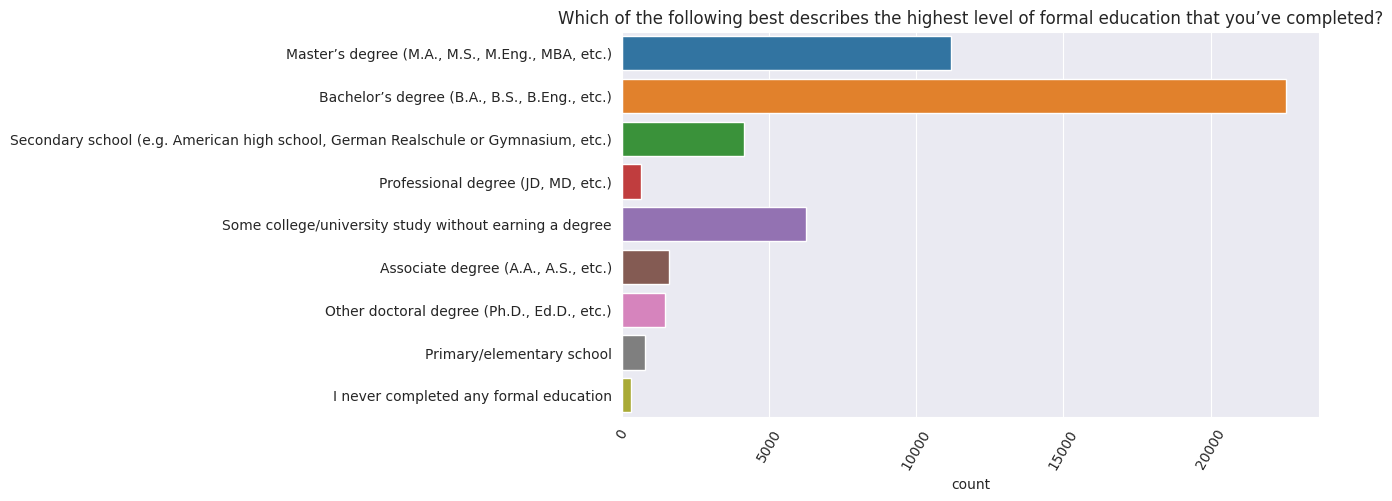

In [29]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=60)
plt.title(schema.EdLevel)
plt.ylabel(None);

> A majority of those surveyed possess either a bachelor's or master's degree, indicating that a majority of programmers have undergone some form of higher education. However, this graph does not reveal whether these degrees are specifically in computer science or fields related to IT

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [30]:
schema.UndergradMajor

'What was your primary field of study?'

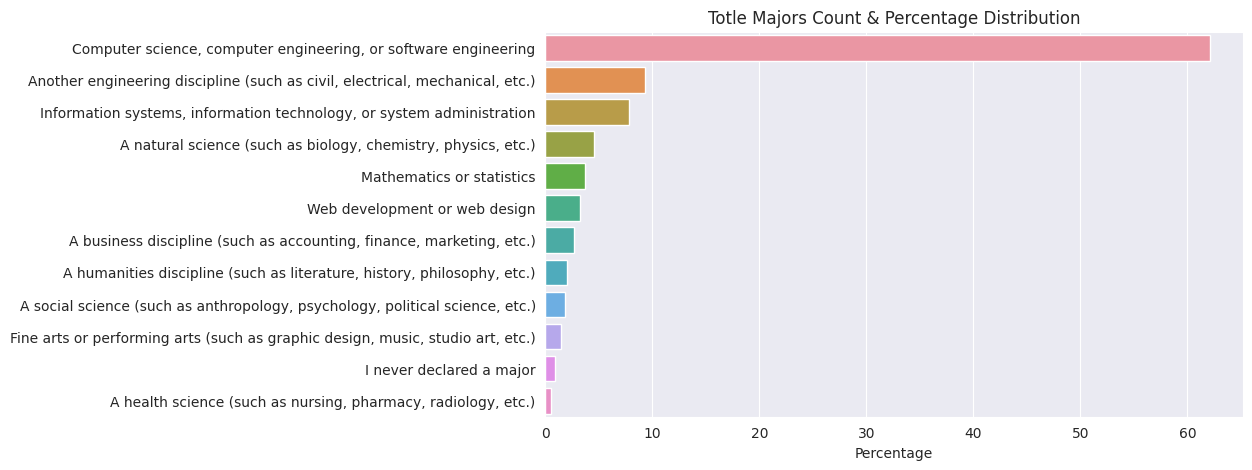

In [31]:
undergrad_pcgt = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pcgt, y=undergrad_pcgt.index)
plt.title("Totle Majors Count & Percentage Distribution")
plt.ylabel(None)
plt.xlabel("Percentage");

> Approximately 40% of programmers who possess a college degree actually studied something other than computer science. This statistic implies that although a college education can be beneficial overall, specializing in computer science might not be a necessary requirement for achieving success as a programmer.

For a deeper analysis, we can explore the variations in responses between individuals with a background in Computer Science and those without such a background.

#Asking and Answering Questions
We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

####**Q: What are the most popular programming languages in 2020?**

To answer, this we can use the `LanguageWorkedWith` column.

In [32]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
5                                 HTML/CSS;Java;JavaScript
7                                               Python;SQL
                               ...                        
64437                                                  NaN
64438       C++;HTML/CSS;JavaScript;Python;Ruby;TypeScript
64439                                                  NaN
64441                                        C;C#;C++;Java
64446    Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...
Name: LanguageWorkedWith, Length: 50115, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [33]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [34]:
language_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
language_worked_df

<ipython-input-33-26a445763b0d>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in col_series[col_series.notnull()].iteritems():


,C#,HTML/CSS,JavaScript,Ruby,SQL,Java,Python,PHP,Swift,C,...,Perl,Objective-C,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64438,False,True,True,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
64439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64441,True,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


> It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [35]:
languages_worked_percentages = language_worked_df.mean().sort_values(ascending=False)*100
languages_worked_percentages

JavaScript               67.349097
HTML/CSS                 62.631947
SQL                      54.672254
Python                   43.851142
Java                     39.451262
Bash/Shell/PowerShell    33.742392
C#                       31.399781
TypeScript               25.613090
PHP                      25.499351
C++                      23.210616
C                        20.963783
Go                        8.755862
Kotlin                    7.744188
Ruby                      7.063753
VBA                       6.002195
Assembly                  5.956301
Swift                     5.868502
R                         5.643021
Rust                      5.152150
Objective-C               4.004789
Dart                      3.851142
Scala                     3.565799
Perl                      3.060960
Haskell                   2.017360
Julia                     0.808141
dtype: float64

We can now plot this information using a horizontal bar chart.

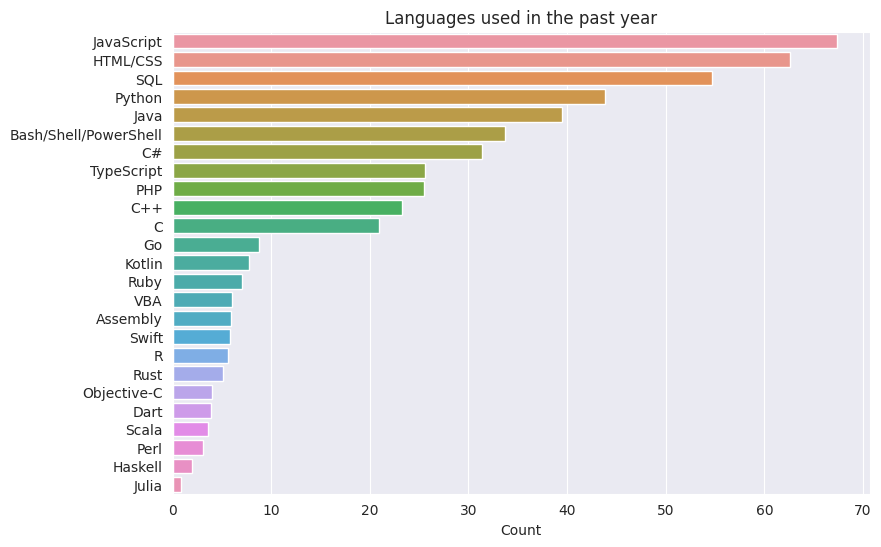

In [36]:
plt.figure(figsize=(9,6))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year")
plt.xlabel("Count");

> Not surprisingly, JavaScript and HTML/CSS emerge as leading skills due to the high demand for web development expertise in today's landscape. Interestingly, web development happens to be one of the most accessible skills to begin mastering. SQL, essential for handling relational databases, is a common tool regularly used by most programmers. Python stands out as a popular preference for various development purposes, surpassing Java, which previously held the position as the industry standard for server and application development for more than twenty years.

**For Deeper Analysis:**

* What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?
* What are the most common languages among respondents who do not describe themselves as "Developer, front-end"?
* What are the most common languages among respondents who work in fields related to data science?
* What are the most common languages used by developers older than 35 years of age?
* What are the most common languages used by developers in your home country?

####**Q: Which languages are the most people interested to learn over the next year?**
For this, we can use the `LanguageDesireNextYear`

In [37]:
language_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = language_interested_df.mean().sort_values(ascending=False)*100
languages_interested_percentages

<ipython-input-33-26a445763b0d>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value  in col_series[col_series.notnull()].iteritems():


Python                   46.467126
JavaScript               45.756759
HTML/CSS                 36.543949
SQL                      35.125212
TypeScript               30.320263
C#                       24.128504
Java                     22.745685
Go                       22.274768
Bash/Shell/PowerShell    20.941834
Rust                     18.796767
C++                      16.893146
Kotlin                   16.673651
PHP                      11.982440
C                        10.459942
Swift                     9.815425
Dart                      8.221091
R                         7.237354
Ruby                      7.127607
Scala                     5.960291
Haskell                   5.158136
Assembly                  4.098573
Julia                     2.797566
Objective-C               2.482291
Perl                      1.865709
VBA                       1.702085
dtype: float64

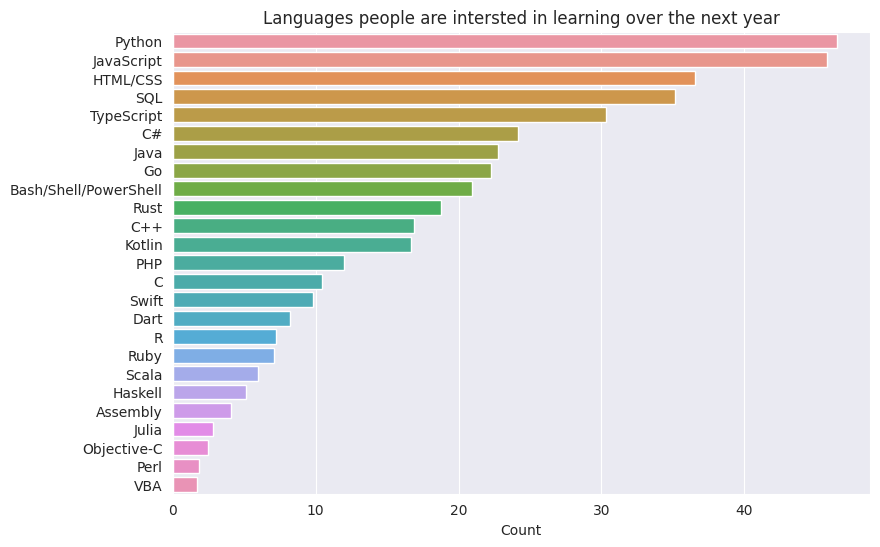

In [38]:
plt.figure(figsize=(9,6))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year")
plt.xlabel("Count");

> It's unsurprising that Python stands out as the top language people are eager to learn. This is owed to its reputation as an accessible, versatile programming language that fits well across various domains: be it application development, numerical computing, data analysis, machine learning, big data handling, cloud automation, web scraping, scripting, and more.

####**Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?**

To achieve this we need to create a new data frame `language_loved_df`, where a language is marked as '`True`' only if it holds a '`True`' value in both `language_worked_df` and `language_interested_df`.

In [39]:
language_loved_df = language_worked_df & language_interested_df

In [46]:
language_loved_percentage = (language_loved_df.sum() * 100 / language_worked_df.sum()).sort_values(ascending=False)
language_loved_percentage

Rust                     86.676995
TypeScript               67.918355
Python                   67.582818
Kotlin                   63.849523
Dart                     62.746114
Go                       62.579763
Julia                    61.481481
C#                       60.911286
Swift                    60.557633
JavaScript               59.119460
SQL                      57.480200
HTML/CSS                 54.629158
Bash/Shell/PowerShell    54.269663
Scala                    53.217683
Haskell                  50.445104
R                        44.908062
Java                     44.762531
C++                      44.523728
Ruby                     42.711864
PHP                      37.475546
C                        33.999619
Assembly                 28.140704
Perl                     27.574967
Objective-C              21.923269
VBA                      18.716755
dtype: float64

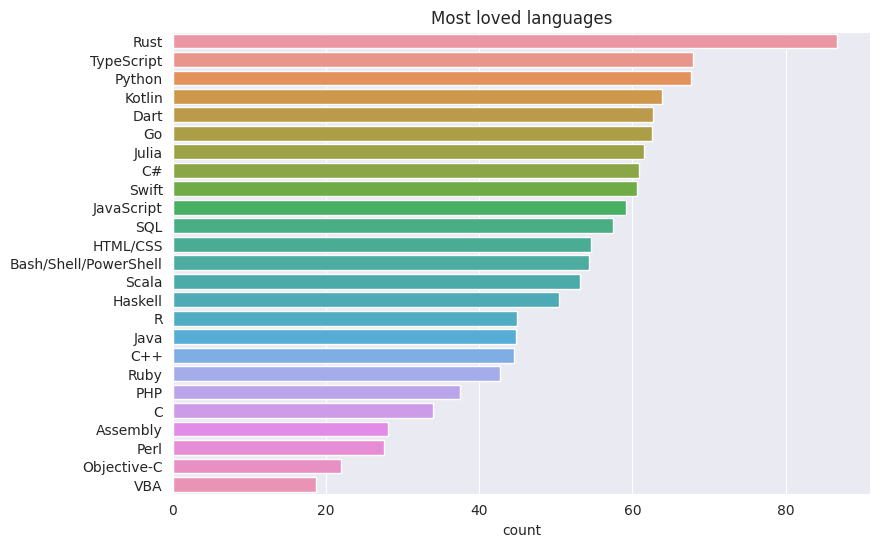

In [47]:
plt.figure(figsize=(9, 6))
sns.barplot(x=language_loved_percentage, y=language_loved_percentage.index)
plt.title("Most loved languages");
plt.xlabel('count');

> For four consecutive years, [Rust](https://en.wikipedia.org/wiki/Rust_(programming_language)) has held the title of [StackOverflow's most favored language](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular/). Following closely behind as the second most admired language is TypeScript, renowned as a compelling substitute for JavaScript in the realm of web development. Claiming the third spot is Python, a language of significant prominence despite already standing as one of the most extensively utilized languages globally. Python's appeal lies in its robust underpinnings, user-friendly nature, expansive collection of specialized libraries, and the immense support of a global community.

####**Q: How important is it to start young to build a career in programming?**
Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [48]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

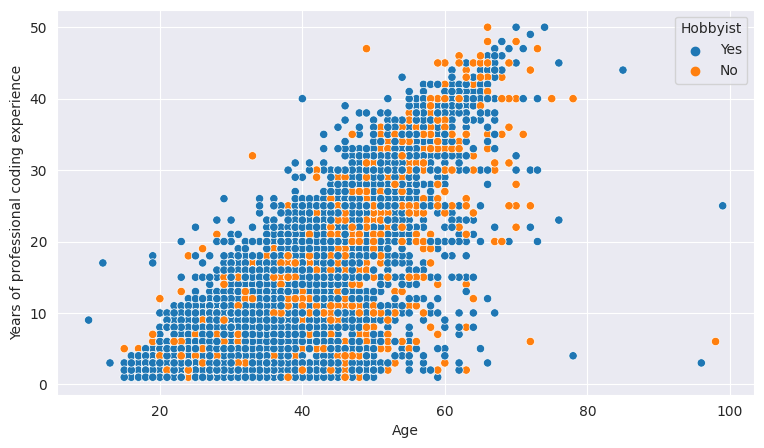

In [49]:
sns.scatterplot(x="Age", y="YearsCodePro", hue="Hobbyist", data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

> Across the graph, various data points highlight the diverse starting ages for professional programming. It's evident that individuals can commence their programming careers at different stages of life. Interestingly, a considerable number of professionals who've been coding for numerous decades also engage in it as a personal hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

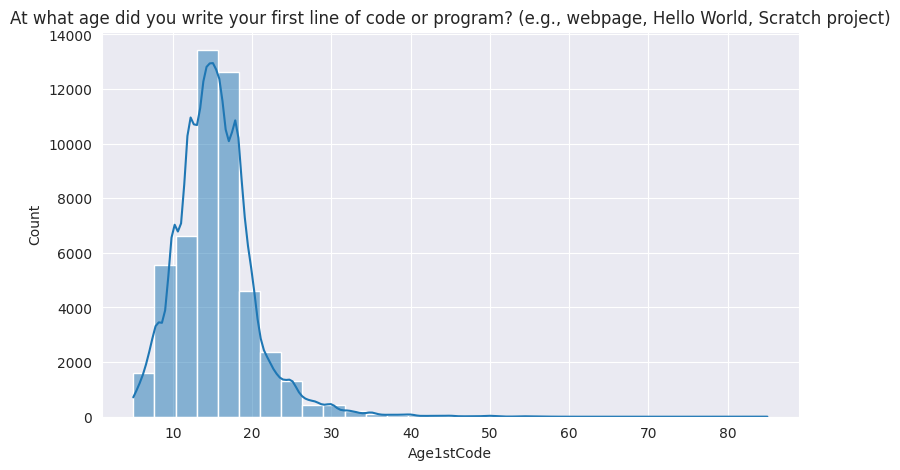

In [51]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

> As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.